Kullanılan Kütüphaneler

In [133]:
import pandas as pd
import sqlite3
import requests
import matplotlib.pyplot as plt

#### Veri tabanı nedir?
Veritabanı uygulamalarımızda , websitelerimizde veya en genel anlamda programlarımızda gerekli olan bilgileri depoladığımız bir yapıdır.

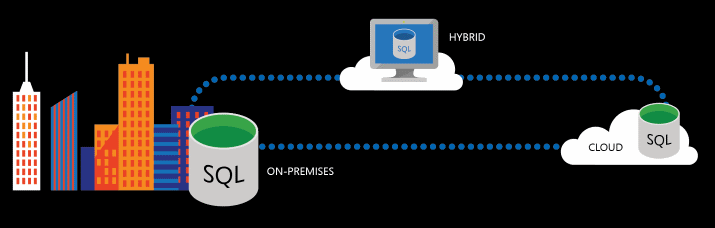

Resim = https://learn.microsoft.com/en-us/sql/sql-server/what-s-new-in-sql-server-2016?view=sql-server-ver16 'den alınmıştır.

###### SQL nedir ? 
Structured Query Language kelimelerinin kısaltılmışı olan SQL bir veri tabanı uygulamasıdır. Türkçe karşılığı Yapılandırılmış Sorgu Dili anlamına gelmektedir.
Birçok veriyi farklı boyutlarda ve farklı fonksiyonlarda barındıran veri tabanlarını yönetim sistemine verilen isimdir. SQL ile bu verilerin yönetimi, silinmesi, aktif edilmesi ve üzerinde çalışılması mümkündür.

SQL ile;

Veri tabanında var olan verileri kaydedebilirsiniz

Veri tabanına yeni veriler çekebilirsiniz

Veri tabanındaki verilerin tamamını güncelleyebilirsiniz

Milyonlarca veri üzerinden sorgulama ve arama yapabilirsiniz

Verileri silebilir, veri kayıtlarını yeniden oluşturarak yeni bir veri tabanı kurabilirsiniz

Veri tabanına ait yeni tablolar üretebilirsiniz

#                                                            SQLITE3

###### Sqlite3'te Syntax Kuralları
Küçük ve Büyük harf duyarlılığı yoktır.
GLOBAL = global


##### SQLITE Veri tabanlarına bağlantı kurma

In [2]:
#Eğer yoksa ülkeverileri.db adında yeni bir veritabanı oluşturulur, eğer mevcut ise bu veritabanına bağlantı yapılır:

sqlConn = sqlite3.connect('ülke_verileri.db')

# connect() fonksiyonu veri tabanlarına bağlantı kurulumunda kullanılan methoddur.

In [6]:
type(sqlConn)

sqlite3.Connection

###### İşaretçi (imleç) tanımlama;

In [3]:
# Veritabanı dosyası üzerinde işlemler yapılabilmesi için bir işaretçi (imleç) tanımlanır.

imlec = sqlConn.cursor()

# imleç olmadan fonksiyonlardan sonuç almak mümkün değildir.

In [5]:
type(imlec)

sqlite3.Cursor

## CRUD İŞLEMLERİ
(create, read, update, delete)

##### 1.Create

Sqlite'da veritabanları tablolardan oluşur. Her bir tablo veritabanında gruplanmış verileri tutar.
Sqlite'da bir tablo oluşturma örneği ile başlayalım ->

In [106]:
# Tablo oluşturmak için işaretçi, execute() methodu ile birlikte kullanılır.

imlec.execute("""CREATE TABLE IF NOT EXISTS veriler(Country TEXT,CountryCodes INT,Population INT, Area INT)""")

# imlec.execute("""CREATE TABLE veriler(Country TEXT,CountryCodes INT,Population INT, Area INT)""")

Veritabanlarını kolay görüntüleyebilmek için DataBase Browserlar kullanılır. Veritabanları Pandas 
ile de görüntülenebilir.

Oluşturduğumuz boş veriler tablosunun DB Browser for SQLite'da görüntüsü:

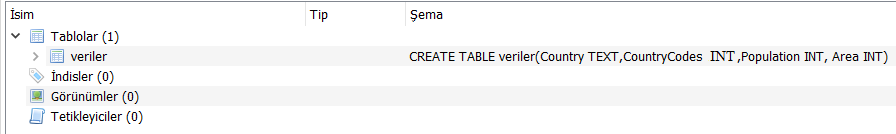

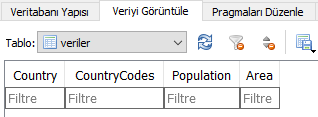

###### Tablolara değerler ekleme:

Bilgilerin alındığı site = https://countrycode.org/

In [107]:
imlec.execute("INSERT INTO veriler VALUES ('Australia', 61 , 21515754, 7686850) ")

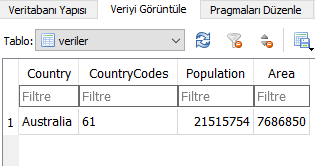

In [108]:
imlec.execute("INSERT INTO veriler VALUES ('Belgium', 32 , 10403000, 30510) ")
imlec.execute("INSERT INTO veriler VALUES ('Canada', 1 , 33679000, 9984670) ")
imlec.execute("INSERT INTO veriler VALUES ('China', 86, 1330044000, 9596960) ")
imlec.execute("INSERT INTO veriler VALUES ('Fiji', 679 , 875983, 18270) ")
imlec.execute("INSERT INTO veriler VALUES ('Luxembourg', 352 , 497538, 2586) ")
imlec.execute("INSERT INTO veriler VALUES ('Peru', 51 , 29907003, 1285220) ")
imlec.execute("INSERT INTO veriler VALUES ('Turkey', 90 , 77804122, 780580) ")
imlec.execute("INSERT INTO veriler VALUES ('United Kingdom', 44 , 62348447, 244820) ")
imlec.execute("INSERT INTO veriler VALUES ('United States', 1 , 310232863, 9629091) ")

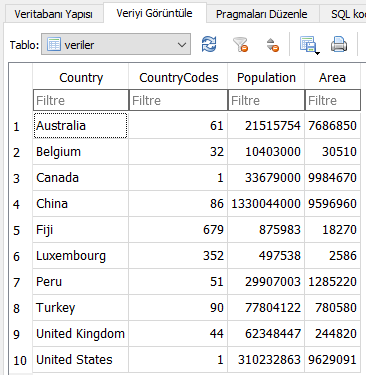

##### 2. Read

###### cursor.fetchall()

Tablodaki şeçilen tüm verileri okur ve bu verileri bir tuple listesi olarak döndürür.

In [263]:
imlec.execute("""SELECT * FROM veriler""")
all_data = imlec.fetchall()
for data in all_data:
    print(data)

('Australia', 61, 21515754, 7686850)
('Belgium', 32, 10403000, 30510)
('Canada', 1, 33679000, 9984670)
('China', 86, 1330044000, 9596960)
('Fiji', 679, 875983, 18270)
('Luxembourg', 352, 497538, 2586)
('Peru', 51, 29907003, 1285220)
('Turkey', 90, 77804122, 780580)
('United Kingdom', 44, 62348447, 244820)
('United States', 1, 310232863, 9629091)


In [42]:
type(all_data)

tuple

In [7]:
imlec.execute("SELECT * FROM veriler")
f_data = imlec.fetchone()
print(f_data)

('Australia', 61, 21515754, 7686850)


In [44]:
imlec.execute("SELECT CountryCodes FROM veriler")
CC_data = imlec.fetchall()
for data in CC_data:
    print(data)

(61,)
(32,)
(1,)
(86,)
(679,)
(352,)
(51,)
(90,)
(44,)
(1,)


In [45]:
type(CC_data)

list

###### Bir koşula bağlı olarak sütun seçme.

In [265]:
imlec.execute("SELECT * FROM veriler WHERE CountryCodes = 1")
d_data = imlec.fetchall()
for data in d_data:
    print(data)

('Canada', 1, 33679000, 9984670)
('United States', 1, 310232863, 9629091)


###### Artan - Azalan Sıralama

In [266]:
imlec.execute("SELECT * FROM veriler ORDER BY Population ASC")
x_data = imlec.fetchall()
for data4 in x_data:
    print(data4)

('Luxembourg', 352, 497538, 2586)
('Fiji', 679, 875983, 18270)
('Belgium', 32, 10403000, 30510)
('Australia', 61, 21515754, 7686850)
('Peru', 51, 29907003, 1285220)
('Canada', 1, 33679000, 9984670)
('United Kingdom', 44, 62348447, 244820)
('Turkey', 90, 77804122, 780580)
('United States', 1, 310232863, 9629091)
('China', 86, 1330044000, 9596960)


In [81]:
imlec.execute("SELECT * FROM veriler ORDER BY Population DESC")
x_data = imlec.fetchall()
for data4 in x_data:
    print(data4)

('China', 86, 1330044000, 9596960)
('United States', 1, 310232863, 9629091)
('Turkey', 90, 77804122, 780580)
('United Kingdom', 44, 62348447, 244820)
('Canada', 1, 33679000, 9984670)
('Peru', 51, 29907003, 1285220)
('Australia', 61, 21515754, 7686850)
('Belgium', 32, 10403000, 30510)
('Fiji', 679, 875983, 18270)
('Luxembourg', 352, 497538, 2586)


###### Unique değerleri alma.

Distinct = Farklı

In [11]:
imlec.execute("SELECT DISTINCT CountryCodes FROM veriler")
z_data = imlec.fetchall()
for data4 in z_data:
    print(data4)

(61,)
(32,)
(1,)
(86,)
(679,)
(352,)
(51,)
(90,)
(44,)


###### Alfabetik Sıralama

In [10]:
imlec.execute("SELECT * FROM veriler ORDER BY Country")
y_data = imlec.fetchall()
for data2 in y_data:
    print(data2)

('Australia', 61, 21515754, 7686850)
('Belgium', 32, 10403000, 30510)
('Canada', 1, 33679000, 9984670)
('China', 86, 1330044000, 9596960)
('Fiji', 679, 875983, 18270)
('Luxembourg', 352, 497538, 2586)
('Peru', 51, 29907003, 1285220)
('Turkey', 90, 77804122, 780580)
('United Kingdom', 44, 62348447, 244820)
('United States', 1, 310232863, 9629091)


###### MAX & MIN değerler

En büyük yüzölçümü:

In [13]:
imlec.execute("SELECT MAX(Area) FROM veriler")
max_area = imlec.fetchall()
print(max_area)

[(9984670,)]


In [46]:
type(max_area)

list

In [14]:
imlec.execute("SELECT MIN(Area) FROM veriler")
min_area = imlec.fetchall()
print(min_area)

[(2586,)]


In [47]:
imlec.execute("SELECT MAX(Area), MIN(Population) FROM veriler")
mm_area = imlec.fetchall()
print(mm_area)

[(9984670, 497538)]


In [48]:
type(mm_area)

list

###### Ortalama

In [16]:
imlec.execute("SELECT AVG(Population) FROM veriler")
avg_pop = imlec.fetchall()
print(avg_pop)

[(187730771.0,)]


###### Count
Bu tabloda kaç ülke vardır?

In [17]:
imlec.execute("SELECT COUNT(*) FROM veriler")
cnt_country = imlec.fetchall()
print(cnt_country)

[(10,)]


#### String İşlemleri

###### Upper ve Lower
Verilerin büyük ve küçük harfe dönüştürülmesi.

In [19]:
imlec.execute("SELECT UPPER(Country) FROM veriler")
upr_country = imlec.fetchall()
for data5 in upr_country:
    print(data5)

('AUSTRALIA',)
('BELGIUM',)
('CANADA',)
('CHINA',)
('FIJI',)
('LUXEMBOURG',)
('PERU',)
('TURKEY',)
('UNITED KINGDOM',)
('UNITED STATES',)


In [20]:
imlec.execute("SELECT LOWER(Country) FROM veriler")
lwr_country = imlec.fetchall()
for data6 in lwr_country:
    print(data6)

('australia',)
('belgium',)
('canada',)
('china',)
('fiji',)
('luxembourg',)
('peru',)
('turkey',)
('united kingdom',)
('united states',)


###### Substring
Belli sayıda harf alma.
Substring belli karakterleri string'den ayırmaya yarar.

In [32]:
imlec.execute("SELECT SUBSTRING(Country,1,3) FROM veriler")
num_country = imlec.fetchall()
for data7 in num_country:
    print(data7)

('Aus',)
('Bel',)
('Can',)
('Chi',)
('Fij',)
('Lux',)
('Per',)
('Tur',)
('Uni',)
('Uni',)


In [33]:
imlec.execute("SELECT SUBSTRING(Country,2,2) FROM veriler")
num0_country = imlec.fetchall()
for data7 in num0_country:
    print(data7)

('us',)
('el',)
('an',)
('hi',)
('ij',)
('ux',)
('er',)
('ur',)
('ni',)
('ni',)


###### String uzunluğu.

In [34]:
imlec.execute("SELECT Country, LENGTH(Country) FROM veriler")
str_country = imlec.fetchall()
for data8 in str_country:
    print(data8)

('Australia', 9)
('Belgium', 7)
('Canada', 6)
('China', 5)
('Fiji', 4)
('Luxembourg', 10)
('Peru', 4)
('Turkey', 6)
('United Kingdom', 14)
('United States', 13)


###### Örnek 1 :
Tabloda istenilen sayıda satır alma.

In [36]:
imlec.execute("SELECT * FROM veriler LIMIT 5")
tablo5 = imlec.fetchall()
for data9 in tablo5:
    print(data9)

('Australia', 61, 21515754, 7686850)
('Belgium', 32, 10403000, 30510)
('Canada', 1, 33679000, 9984670)
('China', 86, 1330044000, 9596960)
('Fiji', 679, 875983, 18270)


###### Örnek 2:
Belli sayılar arasındaki değerleri alma:

In [39]:
imlec.execute("SELECT * FROM veriler WHERE CountryCodes BETWEEN 50 AND 400")
btw_veri = imlec.fetchall()
for data10 in btw_veri:
    print(data10)

('Australia', 61, 21515754, 7686850)
('China', 86, 1330044000, 9596960)
('Luxembourg', 352, 497538, 2586)
('Peru', 51, 29907003, 1285220)
('Turkey', 90, 77804122, 780580)


In [40]:
imlec.execute("SELECT * FROM veriler WHERE CountryCodes NOT BETWEEN 50 AND 400")
btw1_veri = imlec.fetchall()
for data10 in btw1_veri:
    print(data10)

('Belgium', 32, 10403000, 30510)
('Canada', 1, 33679000, 9984670)
('Fiji', 679, 875983, 18270)
('United Kingdom', 44, 62348447, 244820)
('United States', 1, 310232863, 9629091)


###### Like:
İsminde 'e' harfi bulunan ülkeleri yazma: (% operatörü)

In [49]:
imlec.execute("SELECT * FROM veriler WHERE Country LIKE '%e%'")
e_veri = imlec.fetchall()
for data10 in e_veri:
    print(data10)

('Belgium', 32, 10403000, 30510)
('Luxembourg', 352, 497538, 2586)
('Peru', 51, 29907003, 1285220)
('Turkey', 90, 77804122, 780580)
('United Kingdom', 44, 62348447, 244820)
('United States', 1, 310232863, 9629091)


Referans = https://www.w3schools.com/sql/sql_like.asp
1. 'a%' = a ile başlayan
2. '%a%' = a bulunduran
3. 'a__%'= a ile başlayan ve en az 3 karakter uzunluğunda olan (örnek = and)
4. '%o' = o ile biten
5. 'a%o' = a ile başlayan o ile biten

###### Toplama İşlemi

In [51]:
imlec.execute("SELECT SUM(LENGTH(Country)) FROM veriler")
sum_country = imlec.fetchall()
for data14 in sum_country:
    print(data14)

(78,)


##### 3. Update

Tablolardaki verileri güncelleme:

In [267]:
imlec.execute("UPDATE veriler SET CountryCodes = 0 WHERE CountryCodes = 1")

In [268]:
imlec.execute("SELECT * FROM veriler")
all_data1 = imlec.fetchall()
for data in all_data1:
    print(data)

('Australia', 61, 21515754, 7686850)
('Belgium', 32, 10403000, 30510)
('Canada', 0, 33679000, 9984670)
('China', 86, 1330044000, 9596960)
('Fiji', 679, 875983, 18270)
('Luxembourg', 352, 497538, 2586)
('Peru', 51, 29907003, 1285220)
('Turkey', 90, 77804122, 780580)
('United Kingdom', 44, 62348447, 244820)
('United States', 0, 310232863, 9629091)


###### Örnek:
Popülasyonun 2037 yılına kadar %50 artacağı söyleniyor. 2037 yılında ülke popülasyonları nasıl görünür?

In [6]:
imlec.execute("SELECT Country, Population, (Population + (Population / 2)) FROM veriler")
all_data1 = imlec.fetchall()
for data in all_data1:
    print(data)

('Australia', 21515754, 32273631)
('Belgium', 10403000, 15604500)
('Canada', 33679000, 50518500)
('China', 1330044000, 1995066000)
('Fiji', 875983, 1313974)
('Luxembourg', 497538, 746307)
('Peru', 29907003, 44860504)
('Turkey', 77804122, 116706183)
('United Kingdom', 62348447, 93522670)
('United States', 310232863, 465349294)


In [7]:
imlec.execute("""UPDATE veriler SET Population = (Population + (Population / 2))""")

In [8]:
imlec.execute("SELECT Country, Population FROM veriler")
all_data1 = imlec.fetchall()
for data in all_data1:
    print(data)

('Australia', 32273631)
('Belgium', 15604500)
('Canada', 50518500)
('China', 1995066000)
('Fiji', 1313974)
('Luxembourg', 746307)
('Peru', 44860504)
('Turkey', 116706183)
('United Kingdom', 93522670)
('United States', 465349294)


###### Sütun değerlerini boş yapma.

In [8]:
imlec.execute("UPDATE veriler SET Population = NULL")

In [9]:
imlec.execute("SELECT * FROM veriler")
null_data1 = imlec.fetchall()
for data in null_data1:
    print(data)

('Australia', 61, None, 7686850)
('Belgium', 32, None, 30510)
('Canada', 1, None, 9984670)
('China', 86, None, 9596960)
('Fiji', 679, None, 18270)
('Luxembourg', 352, None, 2586)
('Peru', 51, None, 1285220)
('Turkey', 90, None, 780580)
('United Kingdom', 44, None, 244820)
('United States', 1, None, 9629091)


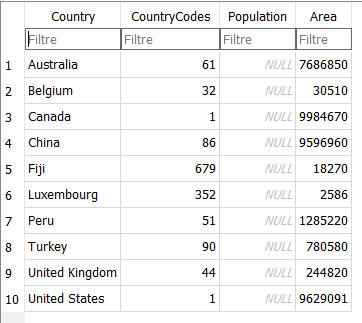

##### 4. Delete

Tablolardan satır silme:

In [269]:
imlec.execute("DELETE FROM veriler WHERE CountryCodes = 0")

#### Pandas ile Database görüntüleme:

Tablolar Data Frame'lere dönüştürülerek Pandas Tablosu şeklinde görüntülebilir.

In [272]:
country_df = pd.read_sql_query("SELECT * from veriler", con=sqlConn)

In [273]:
country_df

,Country,CountryCodes,Population,Area
0,Australia,61,21515754,7686850
1,Belgium,32,10403000,30510
2,China,86,1330044000,9596960
3,Fiji,679,875983,18270
4,Luxembourg,352,497538,2586
5,Peru,51,29907003,1285220
6,Turkey,90,77804122,780580
7,United Kingdom,44,62348447,244820


##### Tablo Silme

2. Tablonun oluşturulması.

In [89]:
imlec.execute("""CREATE TABLE IF NOT EXISTS veriler2(Country TEXT,CountryCodes INT,Population INT, Area INT)""")

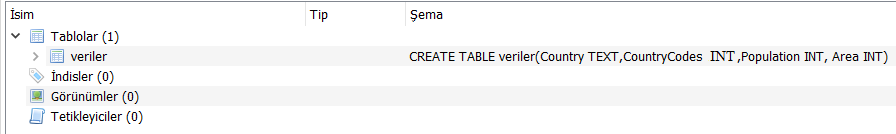

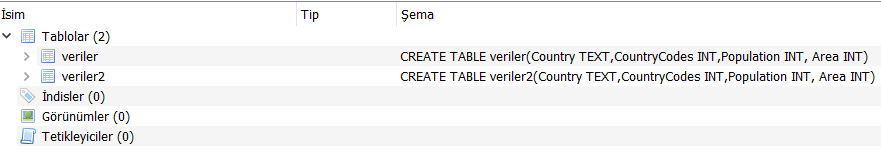

Tablo Silme.

In [90]:
imlec.execute("DROP TABLE veriler2")

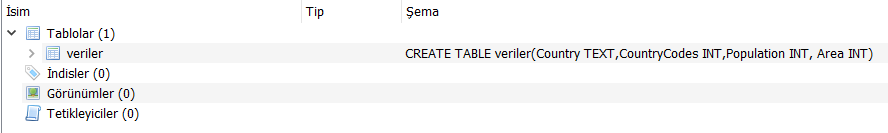

## Tüm değişimleri kaydetme

###### con.commit()

Yukarıdaki yapılan değişikliklerin veritabanı üzerinde uygulanabilmesi için bir onaya ihtiyaç vardır.
Eğer .commit() fonksiyonu kullanılmazsa yapılan güncel değişiklikler veritabanında uygulanmaz.

In [111]:
sqlConn.commit()

# Örnek

##### Text veya csv dosyalarını Veritabanı'na Pandas ile dönüştürme:


Dataframe'in Database'e dönüştürülmesi

In [56]:
link = "https://gist.githubusercontent.com/FanYang715/b3e61d85ec47366d0ba0b1c7625b32c3/raw/2f86c7a64058730442281a622640056e1ad9aece/pokemon.csv"
r = requests.get(link, allow_redirects=True)
with open("pokemon_data.txt", "wb") as file:
    file.write(r.content)

Link = https://gist.githubusercontent.com/FanYang715/b3e61d85ec47366d0ba0b1c7625b32c3/raw/2f86c7a64058730442281a622640056e1ad9aece/pokemon.csv

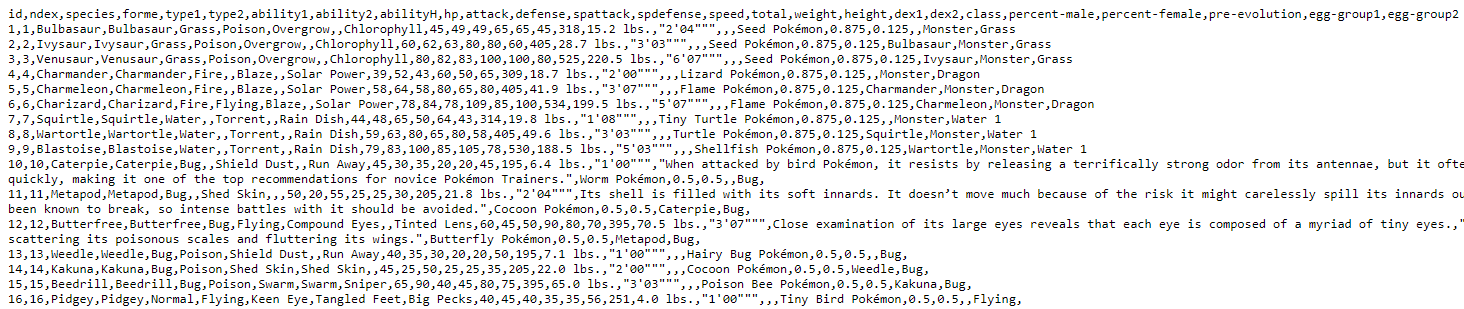

Verilerin Pandas ile okunması:

In [11]:
pokemon_data = pd.read_csv("pokemon_data.txt")
pokemon_df = pd.DataFrame(pokemon_data)

In [13]:
type(pokemon_data)

pandas.core.frame.DataFrame

In [14]:
type(pokemon_df)

pandas.core.frame.DataFrame

Tablo olarak;

In [17]:
pokemon_data.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed Pokémon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon


Database oluşturma

In [10]:
conn = sqlite3.connect('pokemons.db')
Cursor = conn.cursor()

In [20]:
pokemon_data.to_sql('pokemondata', conn, if_exists='replace', index = False)

1061

In [39]:
Cursor.execute('''SELECT * FROM pokemondata''')
x = 0
for row in Cursor.fetchall():
    if x < 6:
        print (row)
        x += 1

(1, 1, 'Bulbasaur', 'Bulbasaur', 'Grass', 'Poison', 'Overgrow', None, 'Chlorophyll', 45, 49, 49, 65, 65, 45, 318, '15.2 lbs.', '2\'04"', None, None, 'Seed Pokémon', 0.875, 0.125, None, 'Monster', 'Grass')
(2, 2, 'Ivysaur', 'Ivysaur', 'Grass', 'Poison', 'Overgrow', None, 'Chlorophyll', 60, 62, 63, 80, 80, 60, 405, '28.7 lbs.', '3\'03"', None, None, 'Seed Pokémon', 0.875, 0.125, 'Bulbasaur', 'Monster', 'Grass')
(3, 3, 'Venusaur', 'Venusaur', 'Grass', 'Poison', 'Overgrow', None, 'Chlorophyll', 80, 82, 83, 100, 100, 80, 525, '220.5 lbs.', '6\'07"', None, None, 'Seed Pokémon', 0.875, 0.125, 'Ivysaur', 'Monster', 'Grass')
(4, 4, 'Charmander', 'Charmander', 'Fire', None, 'Blaze', None, 'Solar Power', 39, 52, 43, 60, 50, 65, 309, '18.7 lbs.', '2\'00"', None, None, 'Lizard Pokémon', 0.875, 0.125, None, 'Monster', 'Dragon')
(5, 5, 'Charmeleon', 'Charmeleon', 'Fire', None, 'Blaze', None, 'Solar Power', 58, 64, 58, 80, 65, 80, 405, '41.9 lbs.', '3\'07"', None, None, 'Flame Pokémon', 0.875, 0.125, 

### DataBase Browser'da Veritabanının açılması;

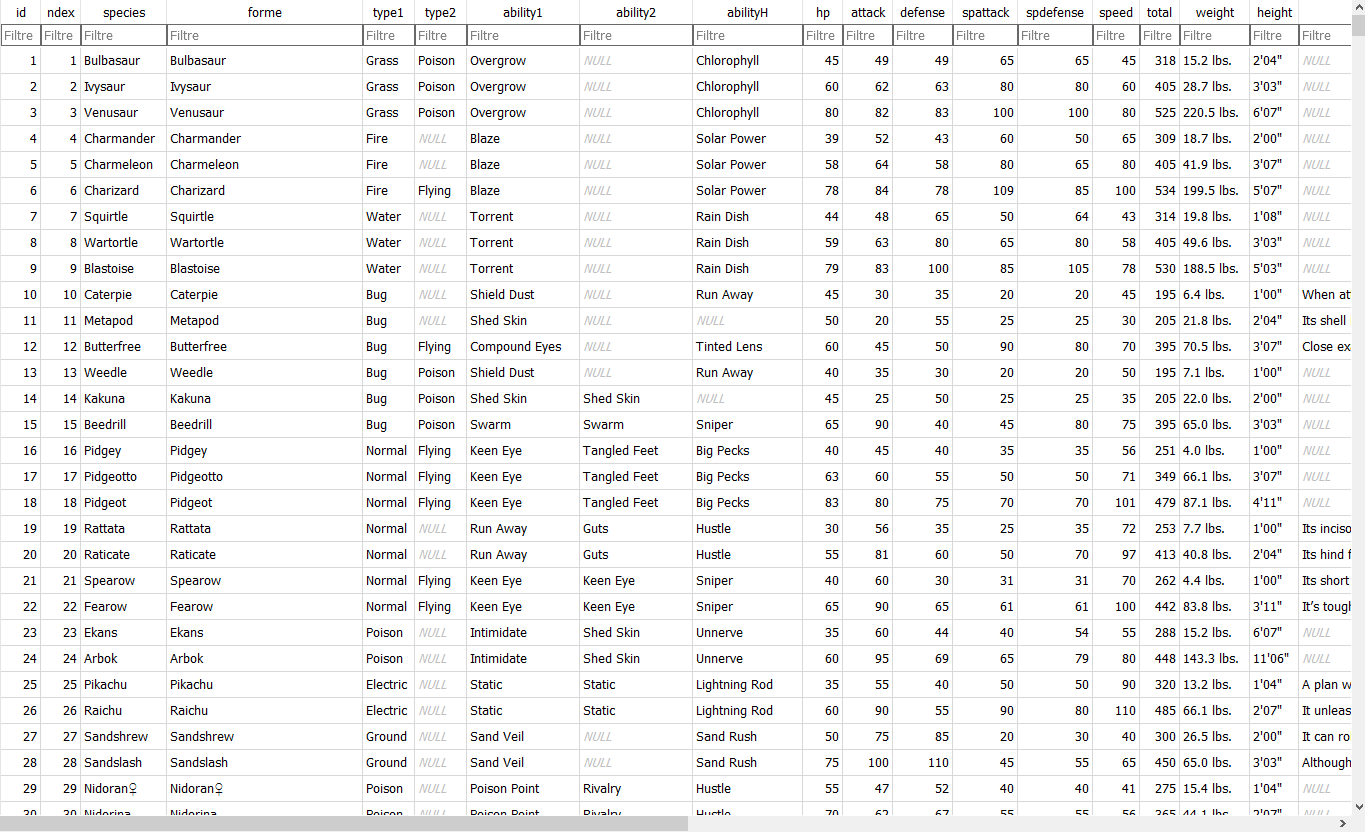

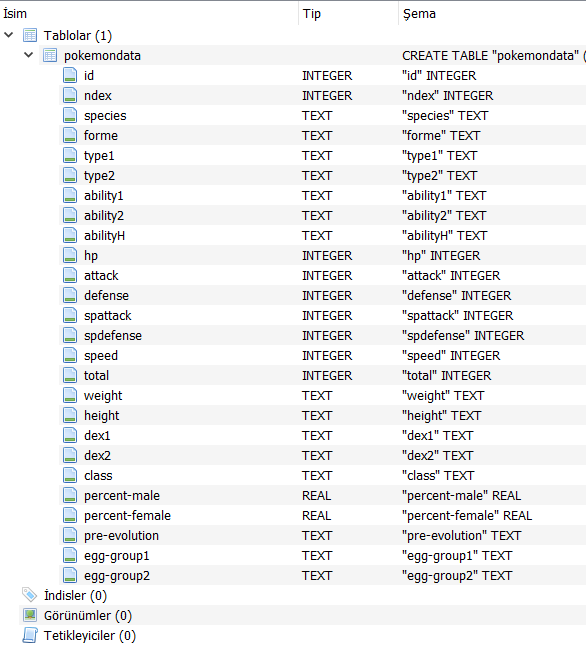

#### Veritabanı tablosunun Dataframe'e dönüştürülmesi

In [68]:
d_f = pd.read_sql_table('pokemondata', 'sqlite:///pokemons.db')

In [69]:
d_f.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,None,Chlorophyll,45,...,15.2 lbs.,"2'04""",None,None,Seed Pokémon,0.875,0.125,None,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,None,Chlorophyll,60,...,28.7 lbs.,"3'03""",None,None,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,None,Chlorophyll,80,...,220.5 lbs.,"6'07""",None,None,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,None,Blaze,None,Solar Power,39,...,18.7 lbs.,"2'00""",None,None,Lizard Pokémon,0.875,0.125,None,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,None,Blaze,None,Solar Power,58,...,41.9 lbs.,"3'07""",None,None,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1058,778,Mimikyu,Mimikyu (Busted Form),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",After going to all the effort of disguising it...,If its neck is broken or its rag torn during a...,Disguise Pokémon,0.500,0.500,None,Amorphous,None
1057,1059,778,Mimikyu,Mimikyu (2),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",None,None,Disguise Pokémon,0.500,0.500,None,Amorphous,None
1058,1060,778,Mimikyu,Mimikyu (3),Ghost,Fairy,Disguise,Disguise,Disguise,60,...,1.5 lbs.,"0'08""",None,None,Disguise Pokémon,0.500,0.500,None,Amorphous,None
1059,1061,784,Kommo-o,Kommo-o (1),Dragon,Fighting,Bulletproof,Soundproof,Overcoat,75,...,172.4 lbs.,"5'03""",None,None,Scaly Pokémon,0.500,0.500,None,Dragon,None


#### En optimal pokemonu bulunuz.

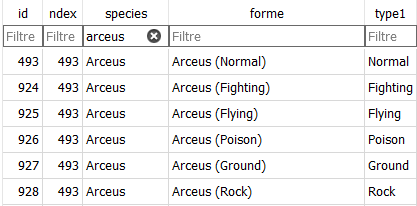

Boş veri var mı yok mu diye kontrol edelim.

In [132]:
Cursor.execute("SELECT *  FROM pokemondata WHERE hp IS NULL OR attack IS NULL OR defense IS NULL OR spattack IS NULL OR spdefense IS NULL OR speed IS NULL")
clr_data11 = Cursor.fetchall()
for row in clr_data11:
     print (row)

In [85]:
Cursor.execute("SELECT DISTINCT species, (hp + attack + defense + spattack + spdefense + speed)/6 FROM pokemondata LIMIT 10")
all_data11 = Cursor.fetchall()
for row in all_data11:
     print (row)

('Bulbasaur', 53)
('Ivysaur', 67)
('Venusaur', 87)
('Charmander', 51)
('Charmeleon', 67)
('Charizard', 89)
('Squirtle', 52)
('Wartortle', 67)
('Blastoise', 88)
('Caterpie', 32)


In [86]:
Cursor.execute("SELECT DISTINCT species, MAX((hp + attack + defense + spattack + spdefense + speed)/6) FROM pokemondata")
pokemon_opt = Cursor.fetchall()
print(pokemon_opt)

[('Mewtwo', 130)]


In [87]:
Cursor.execute("SELECT DISTINCT species, (hp + attack + defense + spattack + spdefense + speed)/6 FROM pokemondata ORDER BY ((hp + attack + defense + spattack + spdefense + speed)/6) DESC LIMIT 10")
all_data11 = Cursor.fetchall()
for row in all_data11:
     print (row)

('Mewtwo', 130)
('Rayquaza', 130)
('Kyogre', 128)
('Groudon', 128)
('Arceus', 120)
('Zygarde', 118)
('Tyranitar', 116)
('Salamence', 116)
('Metagross', 116)
('Latias', 116)


###### Listeye çevirme.

In [64]:
Cursor.execute("SELECT DISTINCT species, (hp + attack + defense + spattack + spdefense + speed)/6 FROM pokemondata ORDER BY ((hp + attack + defense + spattack + spdefense + speed)/6) DESC LIMIT 10")
all_data00 = Cursor.fetchall()
pokemon_list = []
pokemon_value = []
for i in range(len(all_data00)):
    pokemon_list.append(all_data00[i][0])


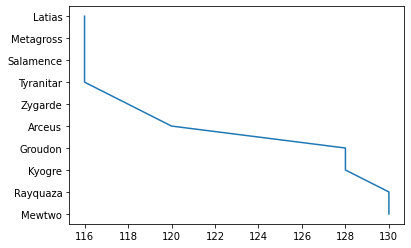

In [66]:
plt.plot(pokemon_value, pokemon_list)

# Project 5: Working with Pandas and SQL Databases (Movies Dataset)

## Creating an SQLite Database

In [ ]:
# BİR SQLITE DATAFRAME OLUŞTURMA

In [67]:
import sqlite3 as sq3

In [68]:
#"connect"ile yeni database ve yeni movie.db dosyasını oluşturuyoruz.

In [69]:
# Sadece yeni database oluşturmuyoruz, aynı zamanda database bir bağlantı da oluşturuyoruz.

In [70]:
con = sq3.connect("movies.db")

In [71]:
# database yoksa "connect", movies adıyla yeni bir database oluşturur.

In [72]:
# Ve yeni bir movies.db dosyamıza sahip olduğumuzu görebiliriz.

In [73]:
con

In [75]:
con.execute("Select * FROM sqlite_master").fetchall()

[('table',
  'Movies',
  'Movies',
  2,
  'CREATE TABLE "Movies" (\n"id" INTEGER,\n  "title" TEXT,\n  "revenue" REAL,\n  "budget" REAL,\n  "belongs_to_collection_name" TEXT,\n  "release_date" TIMESTAMP\n)'),
 ('table',
  'Votes',
  'Votes',
  3,
  'CREATE TABLE "Votes" (\n"id" INTEGER,\n  "vote_count" INTEGER,\n  "vote_average" REAL\n)'),
 ('table',
  'Genres',
  'Genres',
  4,
  'CREATE TABLE "Genres" (\n"genre_id" INTEGER,\n  "genre_name" TEXT,\n  "id" INTEGER\n)'),
 ('table',
  'Prod',
  'Prod',
  5,
  'CREATE TABLE "Prod" (\n"comp_id" INTEGER,\n  "comp_logo_path" TEXT,\n  "comp_name" TEXT,\n  "comp_origin_country" TEXT,\n  "id" INTEGER\n)')]

In [76]:
## CON.EXECUTE ##
# connect methodunu çağırarak bir ara bağlantı nesnesi oluşturur.
# Daha sonra verilen parametrelerle "connect'in execute methodunu" çağırır.

In [77]:
## FETCHALL ##
# Bir sorgu sonucunun tüm satırlarını getirir.
# Tüm satırları demet listesi olarak döndürür.
# Getirilecek kayıt yoksa boş bir liste döndürülür.

In [78]:
con.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name").fetchall()

[('Genres',), ('Movies',), ('Prod',), ('Votes',)]

In [79]:
# Öncelikle bağlantımızı kapatmalıyız.

In [80]:
con.close()

In [81]:
# Ve şimdi bir yöntemi çalıştırmayı denediyseniz, kapalı veritabanlarında işlem yapamayacağımız mesajını alıyoruz.

## Loading Data from DataFrames into an SQLite Database

In [82]:
import pandas as pd
import json

In [83]:
# IMPORT JSON: Serileştirme, verileri JSON formatına kodlama işlemidir (Python listesini JSON'a dönüştürmek gibi). "
# Seri kaldırma, JSON verilerinin yeniden çalışabileceğiniz yerel nesnelere dönüştürülmesi işlemidir (JSON verilerini bir Python listesine okumak gibi).

In [84]:
# Daha sonra Json dosyasını açıp değişken data üzerindeki datayı restore ediyoruz.

In [85]:
with open("some_movies.json") as f:
    data = json.load(f)

In [86]:
#JSON formatındaki veriyi alıp Python’ın anlayabileceği şekilde bir dictionary (sözlük) yapısı haline getirir.

In [87]:
data

[{'adult': False,
  'backdrop_path': '/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg',
  'belongs_to_collection': {'id': 86311,
   'name': 'The Avengers Collection',
   'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
   'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
  'budget': 356000000,
  'genres': [{'id': 12, 'name': 'Adventure'},
   {'id': 878, 'name': 'Science Fiction'},
   {'id': 28, 'name': 'Action'}],
  'homepage': 'https://www.marvel.com/movies/avengers-endgame',
  'id': 299534,
  'imdb_id': 'tt4154796',
  'original_language': 'en',
  'original_title': 'Avengers: Endgame',
  'overview': "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store.",
  'popularity': 50.279,
  'poster_path': '/or06FN3Dka5tukK1e9sl16pB3iy

In [88]:
# Pandas json_normalize() işlevi, JSON'u bir DataFrame'e dönüştürmenin hızlı, kullanışlı ve güçlü bir yoludur.

In [89]:
df = pd.json_normalize(data, sep = "_")

In [90]:
# Sütunları "sep" kullanarak ayırdık.

In [91]:
df

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,belongs_to_collection_poster_path,belongs_to_collection_backdrop_path,belongs_to_collection
0,False,/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,...,Part of the journey is the end.,Avengers: Endgame,False,8.3,12607,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,NaN
1,False,/wcC7kCICL6x6zHUlUyNp9pWoqW1.jpg,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,False,7.4,21000,87096.0,Avatar Collection,/nslJVsO58Etqkk17oXMuVK4gNOF.jpg,/8nCr9W7sKus2q9PLbYsnT7iCkuT.jpg,NaN
2,False,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,Every generation has a story.,Star Wars: The Force Awakens,False,7.4,14205,10.0,Star Wars Collection,/r8Ph5MYXL04Qzu4QBbq2KjqwtkQ.jpg,/d8duYyyC9J5T825Hg7grmaabfxQ.jpg,NaN
3,False,/lmZFxXgJE3vgrciwuDib0N8CfQo.jpg,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,Avengers: Infinity War,As the Avengers and their allies have continue...,...,An entire universe. Once and for all.,Avengers: Infinity War,False,8.3,17718,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,NaN
4,False,/6VmFqApQRyZZzmiGOQq2C92jyvH.jpg,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,597,tt0120338,en,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,...,Nothing on Earth could come between them.,Titanic,False,7.8,16661,NaN,NaN,NaN,NaN,NaN
5,False,/9OywzJLgobAbSGfhMXligzTylko.jpg,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,The park is open.,Jurassic World,False,6.6,15399,328.0,Jurassic Park Collection,/qIm2nHXLpBBdMxi8dvfrnDkBUDh.jpg,/njFixYzIxX8jsn6KMSEtAzi4avi.jpg,NaN
6,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",https://movies.disney.com/the-lion-king-2019,420818,tt6105098,en,The Lion King,"Simba idolizes his father, King Mufasa, and ta...",...,The King has Returned.,The Lion King,False,7.2,5425,NaN,NaN,NaN,NaN,NaN
7,False,/v3A0T4fAz8xRugAkfUVkxGLd377.jpg,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,Some assembly required.,The Avengers,False,7.7,22101,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,NaN
8,False,/7X6zOOEzXTQJkzDgBHVly1BgyYu.jpg,190000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.furious7.com/,168259,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,...,Vengeance Hits Home,Furious 7,False,7.3,7359,9485.0,The Fast and the Furious Collection,/uv63yAGg1zETAs1XQsOQpava87l.jpg,/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg,NaN
9,False,/4zmNJNQkugbalqJLnKp0wnlp8i3.jpg,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,15548,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv

In [92]:
#Şimdi id, title, revenue, budget,belongs to collection the name ,release date gibi en önemli özellikleri içeren bir dataframe oluşturalım.

In [93]:
## DataFrame ve movies için kaydediyoruz.

In [94]:
movies = df[["id", "title", "revenue", "budget", "belongs_to_collection_name", "release_date"]].copy()
movies

,id,title,revenue,budget,belongs_to_collection_name,release_date
0,299534,Avengers: Endgame,2797800564,356000000,The Avengers Collection,2019-04-24
1,19995,Avatar,2787965087,237000000,Avatar Collection,2009-12-10
2,140607,Star Wars: The Force Awakens,2068223624,245000000,Star Wars Collection,2015-12-15
3,299536,Avengers: Infinity War,2046239637,300000000,The Avengers Collection,2018-04-25
4,597,Titanic,1845034188,200000000,NaN,1997-11-18
5,135397,Jurassic World,1671713208,150000000,Jurassic Park Collection,2015-06-06
6,420818,The Lion King,1656943394,260000000,NaN,2019-07-12
7,24428,The Avengers,1519557910,220000000,The Avengers Collection,2012-04-25
8,168259,Furious 7,1515047671,190000000,The Fast and the Furious Collection,2015-04-01
9,99861,Avengers: Age of Ultron,1405403694,250000000,The Avengers Collection,2015-04-22


In [95]:
# INFO: Bu Yöntem, dataframe bilgilerini veya özetini yazdırır.
# İndeks tipi, dtipi, sütunlar, değer olmayanlar ve bellek kullanımı gibi Dataframe'in çeşitli bilgilerini yazdırır.
# Veri kümesine hızlı bir genel bakış sağlar.

In [96]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          18 non-null     int64 
 1   title                       18 non-null     object
 2   revenue                     18 non-null     int64 
 3   budget                      18 non-null     int64 
 4   belongs_to_collection_name  15 non-null     object
 5   release_date                18 non-null     object
dtypes: int64(3), object(3)
memory usage: 992.0+ bytes


In [97]:
# DATETIME: Tarihleri ve saatleri değiştirmek için sınıflar sağlar. 

In [98]:
# Burada "release date" sütununda bir sorunumuz var, bu nedenle "data type" "date time" olmalıdır.

In [99]:
movies.release_date = pd.to_datetime(df.release_date)

In [100]:
# Bir milyon ABD doları cinsinden belirlemek daha uygun olabilir.

In [101]:
movies.revenue = df.revenue/1000000
movies.budget = df.budget/1000000

In [102]:
# Öyleyse burayı tekrar inceleyelim.

In [103]:
movies

,id,title,revenue,budget,belongs_to_collection_name,release_date
0,299534,Avengers: Endgame,2797.800564,356.0,The Avengers Collection,2019-04-24
1,19995,Avatar,2787.965087,237.0,Avatar Collection,2009-12-10
2,140607,Star Wars: The Force Awakens,2068.223624,245.0,Star Wars Collection,2015-12-15
3,299536,Avengers: Infinity War,2046.239637,300.0,The Avengers Collection,2018-04-25
4,597,Titanic,1845.034188,200.0,NaN,1997-11-18
5,135397,Jurassic World,1671.713208,150.0,Jurassic Park Collection,2015-06-06
6,420818,The Lion King,1656.943394,260.0,NaN,2019-07-12
7,24428,The Avengers,1519.557910,220.0,The Avengers Collection,2012-04-25
8,168259,Furious 7,1515.047671,190.0,The Fast and the Furious Collection,2015-04-01
9,99861,Avengers: Age of Ultron,1405.403694,250.0,The Avengers Collection,2015-04-22


In [104]:
# Ardından, ikinci bir dataframe oluşturalım.

In [105]:
# Bu dataframe , oylar ve derecelendirmeler hakkında bilgi içermelidir, bu nedenle aslında iki sütunumuz var, dolayısıyla "oy sayısı" ve "oy ortalaması" var.

In [106]:
# Aslında, her iki dataframe'de, her iki tablodaki film fikrine sahip olarak, her iki dataframe'i de bağlayabiliriz.

In [107]:
votes = df[["id", "vote_count", "vote_average"]].copy()
votes

,id,vote_count,vote_average
0,299534,12607,8.3
1,19995,21000,7.4
2,140607,14205,7.4
3,299536,17718,8.3
4,597,16661,7.8
5,135397,15399,6.6
6,420818,5425,7.2
7,24428,22101,7.7
8,168259,7359,7.3
9,99861,15548,7.3


In [108]:
# Aslında "genres" sütununu "pd.json_normalize" ile ayrı bir dataframe'e dönüştürebiliriz.

In [109]:
# record_path:str veya str listesi
# Kayıt listesi için her nesnedeki yol. Geçilmezse, verilerin bir kayıt dizisi olduğu varsayılacaktır.

In [110]:
# meta:str veya str listesi
# ortaya çıkan tablodaki her kayıt için metaframe olarak kullanılacak alanlar.

In [111]:
# record_prefix: str

In [112]:
genres = pd.json_normalize(data = data, record_path = "genres", meta = "id", record_prefix = "genre_")
genres

,genre_id,genre_name,id
0,12,Adventure,299534
1,878,Science Fiction,299534
2,28,Action,299534
3,28,Action,19995
4,12,Adventure,19995
5,14,Fantasy,19995
6,878,Science Fiction,19995
7,28,Action,140607
8,12,Adventure,140607
9,878,Science Fiction,140607


In [113]:
# "pd.json_normalize" ile ayrı bir dataframe oluşturabiliyoruz ve ayrıca buraya "id" alarak ana tabloya bir bağlantımız olduğundan emin oluyoruz.

In [114]:
prod = pd.json_normalize(data = data, record_path = "production_companies", meta = "id", record_prefix = "comp_")
prod

,comp_id,comp_logo_path,comp_name,comp_origin_country,id
0,420,/hUzeosd33nzE5MCNsZxCGEKTXaQ.png,Marvel Studios,US,299534
1,444,/42UPdZl6B2cFXgNUASR8hSt9mpS.png,Dune Entertainment,US,19995
2,574,/iB6GjNVHs5hOqcEYt2rcjBqIjki.png,Lightstorm Entertainment,US,19995
3,25,/qZCc1lty5FzX30aOCVRBLzaVmcp.png,20th Century Fox,US,19995
4,290,/Q8mw2AOQQc8Qg0uNwLWq86DVZv.png,Ingenious Media,GB,19995
5,1634,None,Truenorth Productions,IS,140607
6,1,/o86DbpburjxrqAzEDhXZcyE8pDb.png,Lucasfilm,US,140607
7,11461,/p9FoEt5shEKRWRKVIlvFaEmRnun.png,Bad Robot,US,140607
8,420,/hUzeosd33nzE5MCNsZxCGEKTXaQ.png,Marvel Studios,US,299536
9,4,/fycMZt242LVjagMByZOLUGbCvv3.png,Paramount,US,597


In [115]:
# 'movies.db' veritabanımızdaki her bir tabloyu başlatmak istiyoruz.

In [116]:
# Böylece bu 'sq3.connect' methodunu kullanabilir ve 'movies.db' dosya adını iletebiliriz.

In [117]:
con = sq3.connect("movies.db")

In [118]:
con

In [119]:
pd.read_sql("SELECT sum(revenue) FROM Movies", con)

,sum(revenue)
0,29748.575327


In [120]:
con.execute("SELECT sum(revenue) FROM Movies").fetchall()[0][0]

29748.575327000002

In [121]:
pd.read_sql("SELECT count(title) FROM Movies", con)

,count(title)
0,18


In [122]:
pd.read_sql("SELECT count(belongs_to_collection_name) FROM Movies", con)

,count(belongs_to_collection_name)
0,15


In [123]:
pd.read_sql("SELECT avg(budget) FROM Movies", con)

,avg(budget)
0,209.055556


In [124]:
pd.read_sql("SELECT * FROM Movies WHERE id = 597", con)

,id,title,revenue,budget,belongs_to_collection_name,release_date
0,597,Titanic,1845.034188,200.0,None,1997-11-18 00:00:00


In [125]:
pd.read_sql("SELECT * FROM Movies WHERE revenue > 2000", con)

,id,title,revenue,budget,belongs_to_collection_name,release_date
0,299534,Avengers: Endgame,2797.800564,356.0,The Avengers Collection,2019-04-24 00:00:00
1,19995,Avatar,2787.965087,237.0,Avatar Collection,2009-12-10 00:00:00
2,140607,Star Wars: The Force Awakens,2068.223624,245.0,Star Wars Collection,2015-12-15 00:00:00
3,299536,Avengers: Infinity War,2046.239637,300.0,The Avengers Collection,2018-04-25 00:00:00


In [126]:
pd.read_sql("SELECT MIN(budget) FROM Movies WHERE revenue > 1250", con)

,MIN(budget)
0,125.0


In [127]:
#SELECT DISTINCT:Tekrarlanan değerleri sadeleştirerek farkı değerleri bulmamıza olanak sağlar.

In [128]:
pd.read_sql("SELECT DISTINCT belongs_to_collection_name FROM Movies", con)

,belongs_to_collection_name
0,The Avengers Collection
1,Avatar Collection
2,Star Wars Collection
3,None
4,Jurassic Park Collection
5,The Fast and the Furious Collection
6,Black Panther Collection
7,Harry Potter Collection
8,Frozen Collection
9,The Incredibles Collection


In [129]:
# NULL olmayan bir değer bulunursa TRUE döndürür, aksi takdirde FALSE döndürür.
# NaN olanları listeden kaldırdı.

In [130]:
pd.read_sql("SELECT * FROM Movies WHERE belongs_to_collection_name IS NOT NULL", con)

,id,title,revenue,budget,belongs_to_collection_name,release_date
0,299534,Avengers: Endgame,2797.800564,356.0,The Avengers Collection,2019-04-24 00:00:00
1,19995,Avatar,2787.965087,237.0,Avatar Collection,2009-12-10 00:00:00
2,140607,Star Wars: The Force Awakens,2068.223624,245.0,Star Wars Collection,2015-12-15 00:00:00
3,299536,Avengers: Infinity War,2046.239637,300.0,The Avengers Collection,2018-04-25 00:00:00
4,135397,Jurassic World,1671.713208,150.0,Jurassic Park Collection,2015-06-06 00:00:00
5,24428,The Avengers,1519.557910,220.0,The Avengers Collection,2012-04-25 00:00:00
6,168259,Furious 7,1515.047671,190.0,The Fast and the Furious Collection,2015-04-01 00:00:00
7,99861,Avengers: Age of Ultron,1405.403694,250.0,The Avengers Collection,2015-04-22 00:00:00
8,284054,Black Panther,1346.739107,200.0,Black Panther Collection,2018-02-13 00:00:00
9,12445,Harry Potter and the Deathly Hallows: Part 2,1341.511219,125.0,Harry Potter Collection,2011-07-07 00:00:00


In [131]:
con.close()

# Referans
1. https://github.com/royalosyin/Practice-SQL-with-SQLite-and-Jupyter-Notebook
2. https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html
3. https://www.tutorialspoint.com/sqlite/sqlite_commands.htm
4.https://gist.githubusercontent.com/FanYang715/b3e61d85ec47366d0ba0b1c7625b32c3/raw/2f86c7a64058730442281a622640056e1ad9aece/pokemon.csv
5. https://countrycode.org/
6. https://sparkbyexamples.com/pandas/pandas-read-sql-query-or-table/
7. https://www.w3resource.com/sqlite-exercises/
8. https://veriakademi.com/sql-nedir
9. https://www.w3schools.com/sql/sql_like.asp
10. https://www.worldometers.info/world-population/